# Lesson 1 from fast.ai course

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Import Fastai

In [5]:
from fastai.vision import *
from fastai.metrics import error_rate

In [10]:
#defining batch size for computation
bs = 64

In [5]:
URLs

fastai.datasets.URLs

In [6]:
URLs??

In [7]:
untar??

Object `untar` not found.


In [8]:
untar_data??

In [9]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [10]:
docs(untar_data)

NameError: name 'docs' is not defined

In [11]:
doc(untar_data)

In [11]:
path = untar_data(URLs.PETS)
path

PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet')

In [12]:
path_anno = path/'annotations'
path_img = path/'images'

saving the files in variable called as fnames

In [13]:
fnames = get_image_files(path_img)

confirming that it worked

In [15]:
fnames[:5] #print out names of first 5 images

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/pomeranian_81.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/British_Shorthair_56.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/japanese_chin_102.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/scottish_terrier_76.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/British_Shorthair_98.jpg')]

In [16]:
fnames[5:5] #lest see what it does

[]

In [17]:
fnames[2:6] #lets see what it does

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/japanese_chin_102.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/scottish_terrier_76.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/British_Shorthair_98.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_21.jpg')]

so first number is from index and last number is to index

In [14]:
np.random.seed(2)
#seeding the random number generator

In [15]:
pat = r'/([^/]+)_\d+.jpg$'
#this is a regular expression and needs to study it more

r : The 'r' tells Python to treat the pattern as a raw string i.e. to pass it unchanged to the regular expression interpreter.

'...': string

\d+ : one or more digits

will find out more

In [16]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

In [8]:
help(ImageDataBunch.from_name_re)

Help on method from_name_re in module fastai.vision.data:

from_name_re(path: Union[pathlib.Path, str], fnames: Collection[pathlib.Path], pat: str, valid_pct: float = 0.2, **kwargs) method of builtins.type instance
    Create from list of `fnames` in `path` with re expression `pat`.



In [7]:
help(ImageDataBunch)

Help on class ImageDataBunch in module fastai.vision.data:

class ImageDataBunch(fastai.basic_data.DataBunch)
 |  ImageDataBunch(train_dl: torch.utils.data.dataloader.DataLoader, valid_dl: torch.utils.data.dataloader.DataLoader, fix_dl: torch.utils.data.dataloader.DataLoader = None, test_dl: Union[torch.utils.data.dataloader.DataLoader, NoneType] = None, device: torch.device = None, dl_tfms: Union[Collection[Callable], NoneType] = None, path: Union[pathlib.Path, str] = '.', collate_fn: Callable = <function data_collate at 0x7fed4befd440>, no_check: bool = False)
 |  
 |  DataBunch suitable for computer vision.
 |  
 |  Method resolution order:
 |      ImageDataBunch
 |      fastai.basic_data.DataBunch
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  batch_stats(self, funcs: Collection[Callable] = None, ds_type: fastai.basic_data.DatasetType = <DatasetType.Train: 1>) -> torch.Tensor
 |      Grab a batch of data and call reduction function `func` per channel
 |  
 |  norma

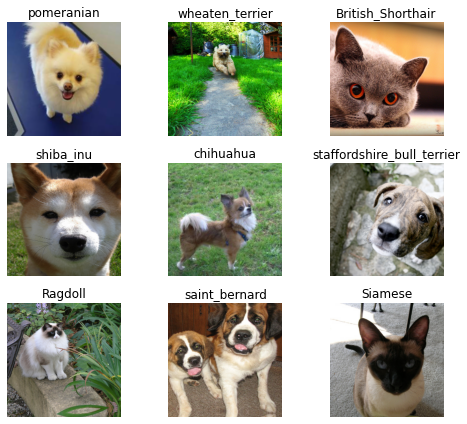

In [19]:
data.show_batch(rows=3, figsize=(7,6))

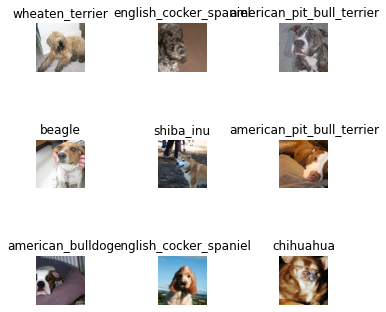

In [20]:
data.show_batch(rows=3, figsize=(5,5)) #Lets see what it does

So it made it smaller

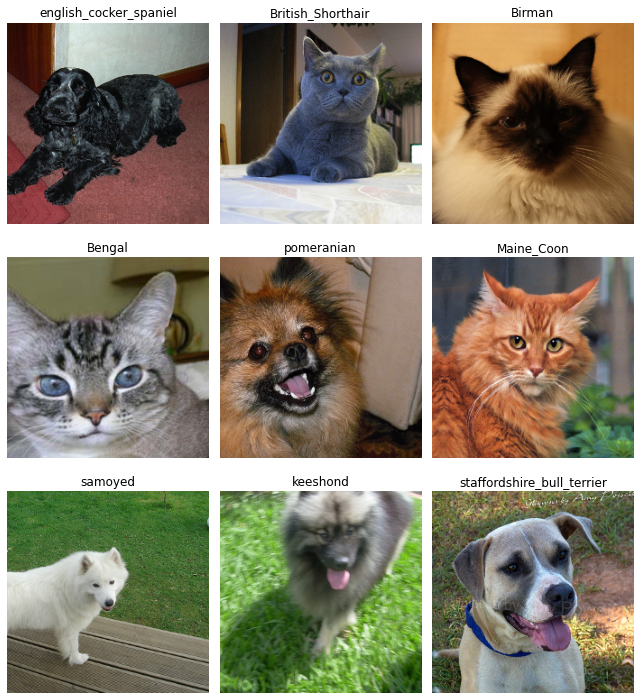

In [21]:
data.show_batch(rows=3, figsize=(9,10))

and this made it bigger

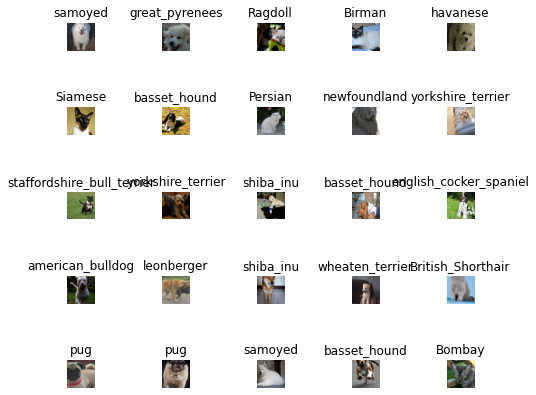

In [22]:
data.show_batch(columns=3, figsize=(7,6))

when changed to columns from rows it showed 5x5
the number was same

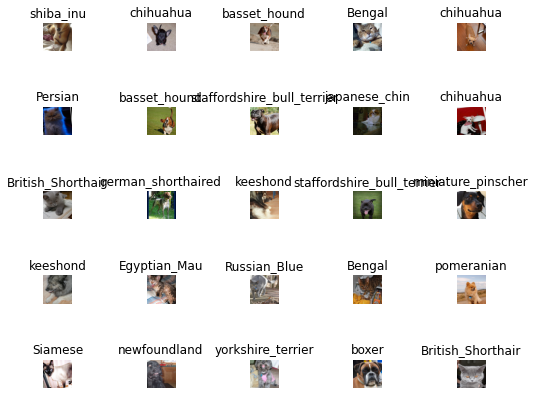

In [23]:
data.show_batch(columns=1, figsize=(7,6))

it shows 5 x 5 even when i pass 1 as argument

In [25]:
help(data.show_batch)

Help on method show_batch in module fastai.basic_data:

show_batch(rows: int = 5, ds_type: fastai.basic_data.DatasetType = <DatasetType.Train: 1>, reverse: bool = False, **kwargs) -> None method of fastai.vision.data.ImageDataBunch instance
    Show a batch of data in `ds_type` on a few `rows`.



In [26]:
doc(data.show_batch) # didn't understand a word

In [27]:
print(data.classes) # it prints the annotations

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [28]:
help(data.c) #didn't understand

Help on int object:

class int(object)
 |  int([x]) -> integer
 |  int(x, base=10) -> integer
 |  
 |  Convert a number or string to an integer, or return 0 if no arguments
 |  are given.  If x is a number, return x.__int__().  For floating point
 |  numbers, this truncates towards zero.
 |  
 |  If x is not a number or if base is given, then x must be a string,
 |  bytes, or bytearray instance representing an integer literal in the
 |  given base.  The literal can be preceded by '+' or '-' and be surrounded
 |  by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
 |  Base 0 means to interpret the base from the string as an integer literal.
 |  >>> int('0b100', base=0)
 |  4
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __ceil__(...)
 |      Ceiling of an Integral retur

In [29]:
data.c #needs to find out what it does

37

In [30]:
len(data.classes)

37

Both give similar results.

Lets train the model with resnet34!!!!!🤘🤘🤘

In [31]:
help(cnn_learner)

Help on function cnn_learner in module fastai.vision.learner:

cnn_learner(data: fastai.basic_data.DataBunch, base_arch: Callable, cut: Union[int, Callable] = None, pretrained: bool = True, lin_ftrs: Union[Collection[int], NoneType] = None, ps: Union[float, Collection[float]] = 0.5, custom_head: Union[torch.nn.modules.module.Module, NoneType] = None, split_on: Union[Callable, Collection[Collection[torch.nn.modules.module.Module]], NoneType] = None, bn_final: bool = False, init=<function kaiming_normal_ at 0x7fed4c25de60>, concat_pool: bool = True, **kwargs: Any) -> fastai.basic_train.Learner
    Build convnet style learner.



In [33]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

in above code
data is the databunch we created with from_name_re
model selected is resnet34
and metrics to use is error_rate

we just created the object for use. we didnt make it learn anything yet.

we will do it next with learn.model

In [34]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

ohhhhhh... these are all parameters that we will be using

In [37]:
help(fit_one_cycle)

Help on function fit_one_cycle in module fastai.train:

fit_one_cycle(learn: fastai.basic_train.Learner, cyc_len: int, max_lr: Union[float, Collection[float], slice] = slice(None, 0.003, None), moms: Tuple[float, float] = (0.95, 0.85), div_factor: float = 25.0, pct_start: float = 0.3, final_div: float = None, wd: float = None, callbacks: Union[Collection[fastai.callback.Callback], NoneType] = None, tot_epochs: int = None, start_epoch: int = None) -> None
    Fit a model following the 1cycle policy.



In [36]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.359609,0.357390,0.117727,00:36
1,0.609445,0.263732,0.079838,00:22
2,0.369938,0.209903,0.069012,00:22
3,0.266509,0.207861,0.066306,00:22


trained the model and got around 95% precesion

In [38]:
learn.save('stage-1')

Saved the model so that i dont screw up

Lets interpret the results

In [42]:
interp = ClassificationInterpretation.from_learner(learn)

In [43]:
losses , idxs = interp.top_losses()

Lets get the top losses

In [44]:
len(data.valid_ds)==len(losses)==len(idxs) #dont knw what i did.. still it said its true😂😂

True

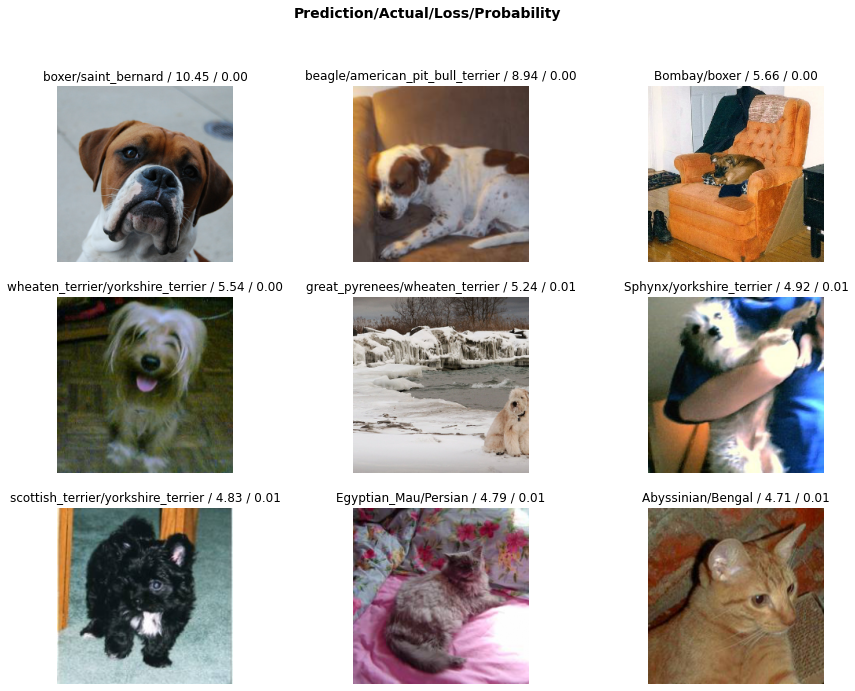

In [46]:
interp.plot_top_losses(9 , figsize=(15,11)) #lets see large images this time... looks awesome

I have skipped the confusion matrix as i will be on top of that

In [47]:
interp.most_confused(min_val=2) # that was good one... its easy and name says it all

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 8),
 ('Ragdoll', 'Birman', 5),
 ('Bengal', 'Abyssinian', 3),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('Siamese', 'Birman', 3),
 ('american_bulldog', 'boxer', 3),
 ('boxer', 'american_bulldog', 3),
 ('yorkshire_terrier', 'havanese', 3),
 ('Abyssinian', 'Egyptian_Mau', 2),
 ('Abyssinian', 'Russian_Blue', 2),
 ('Abyssinian', 'Sphynx', 2),
 ('Bengal', 'Maine_Coon', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Persian', 'Ragdoll', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 2),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('english_cocker_spaniel', 'havanese', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('samoyed', 'great_pyrenees', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

It looks like my classifier is as confused as i am

# now comes the fun part of tweaking

unfreezing the model will make it forget most of the parameters it has learned... thats what i think

i just discovered that presing l key toggles line number
hahahah
    hahahahahaha

In [48]:
learn.unfreeze()

In [49]:
learn.fit_one_cycle(1) # i knw its going to perform worse that before

epoch,train_loss,valid_loss,error_rate,time
0,0.655714,0.408472,0.114344,00:23


As i thought.. it performed worse.. so lets get the better model 

In [52]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pomeranian,British_Shorthair,japanese_chin,wheaten_terrier,scottish_terrier
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_bulldog,Egyptian_Mau,wheaten_terrier,Bengal,havanese
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): C

In [53]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


cool.. dnt knw what it did but says its complete and i can plot

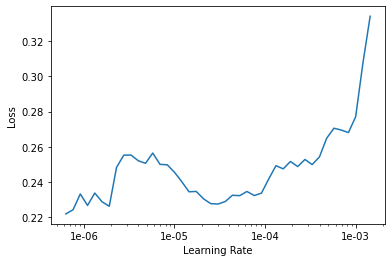

In [54]:
learn.recorder.plot()

In [55]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.243642,0.204367,0.068336,00:23
1,0.218155,0.195559,0.062246,00:23


not a huge jump... lets train it with some more epochs and see

In [56]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.208553,0.189870,0.066306,00:23
1,0.189731,0.185287,0.061570,00:23
2,0.167908,0.185588,0.061570,00:23
3,0.171515,0.184736,0.062923,00:23


Almost the same.... I think the model has reched its limit

## Lets train it with resnet50

we will do the same steps as we did with resnet34.. make data objetc, assign cnn learner to it and then train it.

In [57]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size = 299, bs = bs//2).normalize(imagenet_stats)

In [60]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [61]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.738960,0.283124,0.085927,00:53
1,0.515236,0.299695,0.094046,00:48
2,0.442673,0.307077,0.090663,00:48
3,0.335578,0.211731,0.066306,00:48
4,0.251264,0.201579,0.064953,00:48
5,0.198718,0.185841,0.056157,00:48
6,0.137018,0.173587,0.054127,00:48
7,0.105070,0.171312,0.053451,00:48


In [62]:
learn.save('stage-1-50')

In [63]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.113233,0.172069,0.048714,01:05
1,0.098574,0.163311,0.046685,01:04
2,0.078079,0.169824,0.048714,01:04


In [64]:
learn.save('stage-2-50')

mine did better than before so i saved it

In [65]:
interp = ClassificationInterpretation.from_learner(learn)

In [66]:
interp.most_confused(min_val=2)

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 7),
 ('Ragdoll', 'Birman', 4),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Ragdoll', 'Persian', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('Birman', 'Ragdoll', 2),
 ('Birman', 'Siamese', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('basset_hound', 'beagle', 2),
 ('boxer', 'american_bulldog', 2),
 ('english_cocker_spaniel', 'havanese', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

Cool.... it is smarter than before
now what i need to learn is how to deploy it so i can test my own images

i found something.. lets try it
pred_class, pred_idx, outputs = learn.predict(img);pred_class

lets try it with a doggy image first

In [107]:
img = open_image('/home/jupyter/my_work/data/lesson_1/doggy.jpg')

In [108]:
pred_class, pred_idx, outputs = learn.predict(img)

In [109]:
pred_class

Category pomeranian

😎😎😎😎😎😎😎😎😎😎😎😎😎😎😎

lets try it with a cats

In [98]:
img_kitty = open_image('/home/jupyter/my_work/data/lesson_1/kitty.jpg')

In [104]:
pred_class_kitty, pred_idx_kitty, outputs_kitty = learn.predict(img_kitty)

In [105]:
pred_class_kitty

Category Russian_Blue

In [106]:
pred_idx_kitty

tensor(9)

# That was awesome!!!!!!!!!!!!!! 😎😎😎😎😎